<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 2: Aplicación de PSO

## Clasificación usando regresión logística optimizada por un pso.

La regresión logística es un algoritmo de aprendizaje automático que se utiliza para hacer predicciones para encontrar el valor de una variable dependiente, como la de predecir si un tumor es maligno o benigno, la clasificación del correo electrónico (spam o no spam) o la admisión a una universidad (admitido o no admitido), este algoritmo va aprendiendo de variables independientes (varias características relevantes para el problema).

Por ejemplo, para clasificar un correo electrónico, el algoritmo utilizará las palabras del correo electrónico como características y, en función de eso, hará una predicción de si el correo electrónico es spam o no.

In [1]:
import numpy as np
import pandas as pd

### Codificando Regresión Logística

In [2]:
data_df = pd.read_csv('Data/exdata1.csv')
data_df

,0,1,2
0,0.131117,-0.694103,0.0
1,0.567389,0.339034,0.0
2,2.855025,2.971203,1.0
3,0.541739,0.560591,0.0
4,0.073822,-0.335345,0.0
...,...,...,...
195,2.838675,2.946874,1.0
196,0.479348,0.361812,0.0
197,2.032113,3.419321,1.0
198,3.537026,3.091923,1.0


In [3]:
X = data_df.iloc[:,:-1]

In [4]:
X.shape

(200, 2)

In [5]:
type(X)

pandas.core.frame.DataFrame

In [6]:
y = data_df.iloc[:,-1]

In [7]:
y.shape

(200,)

In [8]:
type(y)

pandas.core.series.Series

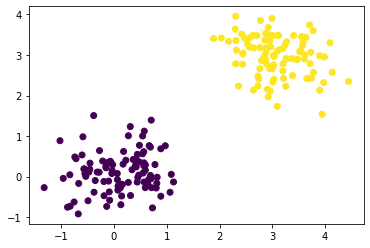

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0].values, X.iloc[:,1].values, c=y)

Una regresión Linea puede representarse como:

$$\hat{f}(x) = \beta^T X$$

Aplicando la función sigmoide a la salida de la regresión logística:

$$\hat{f}(x) = \sigma(\beta^T X)$$

Donde la función sigmoide está definida como:

$$\sigma(t) = \frac{1}{1+e^{-t}}$$

Entonces el modelo de regresión logística nos queda:

$$\hat{f}(x) = \frac{1}{1+e^{-\beta^T X}}$$


Si la suma ponderada de las entradas es mayor que cero, la clase predicha es 1 y viceversa. Entonces, el límite de decisión que separa ambas clases se puede encontrar al establecer la suma ponderada de las entradas en 0.

$$
\hat{f}(\textbf{x}) = \begin{cases}  \textrm{>0.5, si  }  \beta^T X \geq 0 \\ \\  \textrm{<0.5, si  } \beta^T X \leq 0\\ \end{cases}
$$

#### Función de costo

Al igual que la regresión lineal, se define una función de costo para nuestro modelo y el objetivo será minimizar el costo.

$$
cost = \begin{cases}  -\log{\hat{f}(x)}, \textrm{si  }  y=1 \\ \\  -\log{(1 - \hat{f}(x)}), \textrm{si  }  y=0 \\ \end{cases}
$$

#### Intuición de la función de costo

Si la clase de los datos reales es 1 y el modelo predice 0, deberíamos penalizar al modelo y viceversa. Como se puede ver en la figura de abajo, para la gráfica $-\log(\hat{f}(x))$ cuando $\hat{f}(x)$ se acerca a 1, el costo es 0 y cuando h(x) se acerca a 0, el costo es infinito (es decir, penalizamos fuertemente el modelo). De manera similar, para la gráfica $-\log(1-\hat{f}(x))$ cuando el valor real es 0 y el modelo predice 0, el costo es 0 y el costo se vuelve infinito cuando $\hat{f}(x)$ se acerca a 1.

<img style="float: center;;" src='Figures/log_reg.png' width="400" height="100"/></a>

Combinando las dos ecuaciones tenemos:

$$cost(\hat{f}(x),y) = -y\log(\hat{f}(x)) - (1-y)\log(1-\hat{f}(x))$$

Entonces el costo de todos los puntos en los datos reales se puede calcular tomando el promedio del costo de todas las muestras:

$$J(\beta) = -\frac{1}{m} \sum_{i=1}^m[y^{(i)}\log\hat{f}(x^{(i)}) + (1-y^{(i)})\log(1 - \hat{f}(x^{(i)}))]$$

In [10]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [11]:
def regresor(beta,X):
    return np.dot(X,beta)

In [12]:
def f_hat_model(beta,X):
    return sigmoid(regresor(beta,X))

In [13]:
def cost_function(beta,X, y):
    m=X.shape[0]
    cost = -(1/m)*np.sum(y*np.log(f_hat_model(beta,X)) + (1-y)*np.log(1 - f_hat_model(beta,X)))
    return cost

In [14]:
def gradient(beta,X,y):
    m=X.shape[0]
    return (1/m)*np.dot(X.T, sigmoid(regresor(beta,X)) - y)

### Optimizando con el Gradiente

In [15]:
type(y)

pandas.core.series.Series

In [16]:
Xa = np.c_[np.ones((X.shape[0],1)), X]
y = y.values.reshape(len(y),1)
Beta = np.zeros((Xa.shape[1],1))

In [17]:
import scipy.optimize as opt

In [19]:
help(opt.fmin_tnc)

Help on function fmin_tnc in module scipy.optimize.tnc:

fmin_tnc(func, x0, fprime=None, args=(), approx_grad=0, bounds=None, epsilon=1e-08, scale=None, offset=None, messages=15, maxCGit=-1, maxfun=None, eta=-1, stepmx=0, accuracy=0, fmin=0, ftol=-1, xtol=-1, pgtol=-1, rescale=-1, disp=None, callback=None)
    Minimize a function with variables subject to bounds, using
    gradient information in a truncated Newton algorithm. This
    method wraps a C implementation of the algorithm.
    
    Parameters
    ----------
    func : callable ``func(x, *args)``
        Function to minimize.  Must do one of:
    
        1. Return f and g, where f is the value of the function and g its
           gradient (a list of floats).
    
        2. Return the function value but supply gradient function
           separately as `fprime`.
    
        3. Return the function value and set ``approx_grad=True``.
    
        If the function returns None, the minimization
        is aborted.
    x0 : arra

In [20]:
def fit(X, y, beta):
    opt_pesos = opt.fmin_tnc(func=cost_function, x0=beta, fprime=gradient, args=(X,y.flatten()))
    return opt_pesos[0]


In [21]:
Beta

array([[0.],
       [0.],
       [0.]])

In [22]:
Beta_sol = fit(Xa, y, Beta)
Beta_sol

<ipython-input-13-e6edb3c09480>:3: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*np.sum(y*np.log(f_hat_model(beta,X)) + (1-y)*np.log(1 - f_hat_model(beta,X)))
<ipython-input-13-e6edb3c09480>:3: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m)*np.sum(y*np.log(f_hat_model(beta,X)) + (1-y)*np.log(1 - f_hat_model(beta,X)))


array([-25.11316106,  10.64528041,   5.3689346 ])

$$f_{reg} = -25.11 + 10.64*x1 + 5.36*x2$$
$$\hat{f} = \sigma(-25.11 + 10.64*x1 + 5.36*x2)$$

$$\hat{f}(x) = \frac{1}{1+e^{-(-25.11 + 10.64*x1 + 5.36*x2)}}$$

Como hay dos características en nuestro conjunto de datos, la ecuación lineal se puede representar mediante:

$$\hat{f}(x)=\beta_0 + \beta_1 x_1 + \beta_2 x_2$$

El límite de decisión se puede encontrar estableciendo la suma ponderada de las entradas en 0. Es decir igualar $\hat{f}(x)=0$, entonces:

$$x_2 = - \frac{\beta_0 + \beta_1 x_1}{\beta_2}$$

0

$$x_1 = - \frac{\beta_0 + \beta_2 x_2}{\beta_1}$$

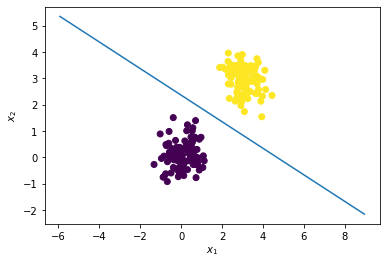

In [23]:
x_values = [np.min(Xa[:,2]) -5, np.max(Xa[:,2])+5]
y_values = - (Beta_sol[0] + np.dot(Beta_sol[2],x_values)) / Beta_sol[1]

plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0].values, X.iloc[:,1].values, c=y)
plt.plot(x_values, y_values, label='frontera de decisión')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [24]:
X_new = np.array([[1, 1,2]])

In [28]:
#Predicción
X_new = np.array([[1, 8,5],
                  [1, 1,2]])
np.round(f_hat_model(Beta_sol,X_new))

array([1., 0.])

### Con Sklearn

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(fit_intercept=False)
model.fit(Xa, y.ravel())
predict_class = model.predict(Xa)

Beta_sklearn = model.coef_[0]

In [33]:
Beta_sklearn

array([-3.72950368,  1.44931094,  1.32200779])

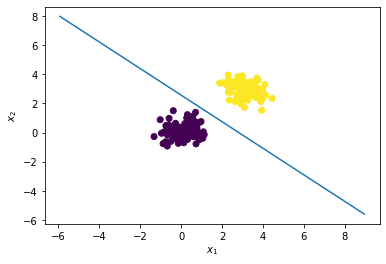

In [34]:
x_values = [np.min(Xa[:,2]) -5, np.max(Xa[:,2])+5]
y_values = - (Beta_sklearn[0] + np.dot(Beta_sklearn[2],x_values)) / Beta_sklearn[1]

plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0].values, X.iloc[:,1].values, c=y)
plt.plot(x_values, y_values, label='frontera de decisión')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## Aplicando PSO

In [ ]:
def cost_function(beta,X, y):
    m=X.shape[0]
    cost = -(1/m)*np.sum(y*np.log(f_hat_model(beta,X)) + (1-y)*np.log(1 - f_hat_model(beta,X)))
    return cost